In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
type(mnist.target[0])

str

In [ ]:
X.shape # 28 x 28 px = 784

NameError: name 'X' is not defined

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.shape

(70000,)

We will graph an instance's feature vector. An instance here is an image of a digit stored as a row in the dataset.

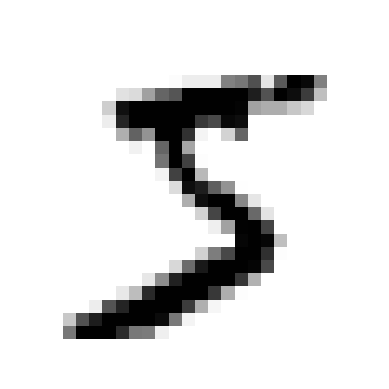

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

INDEX = 0

some_digit = np.array(X.iloc[INDEX])
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y = y.astype(np.int8)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classifier

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(y_train_5)

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool


### Stochastic Gradient Descent (SGD) Classifier

- can handle extremely large datasets

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

c:\Users\hursh\miniconda3\envs\tf2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance Measures

### Cross Validation

Same as done before, in chapter 2

In [ ]:
y_train_pred_original = sgd_clf.predict(X_train)

In [ ]:
from sklearn.model_selection import cross_val_predict

# get a clean prediction in each iteration
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
# Implementation of Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    # creates a new, untrained model using the same hyperparameters as the original
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))



0.9669
0.91625
0.96785


In [ ]:
from sklearn.metrics import confusion_matrix
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_train_5, y_train_pred)

In [ ]:
rec = recall_score(y_train_5, y_train_pred)

In [ ]:
f1 = 2/(1/prec + 1/rec)
f1

0.7325171197343847

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

## Precision-Recall Tradeoff

Stochastic Gradient Descent has a decision function that gives a score to an X value. Based on a threshold, it classifies as positive or negative.

`sklearn` doesn't let us set the threshold value. But we have access to the decision score to make predictions. We can call the `decision_function()`

In [ ]:
sgd_clf.decision_function([some_digit])

c:\Users\hursh\miniconda3\envs\tf2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

How to decide which threshold to use?

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
thresholds

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

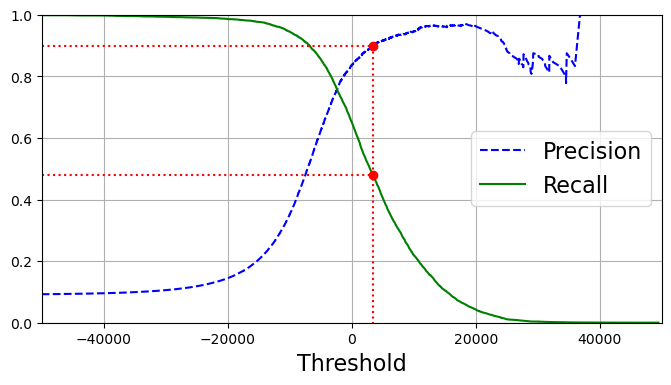

In [ ]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
recall_90_precision = recalls[np.argmax(precisions > 0.9)]
thresholds_90_precision = thresholds[np.argmax(precisions > 0.9)]
plt.plot([-50000, thresholds_90_precision],[0.9, 0.9], 'r:')
plt.plot([thresholds_90_precision, thresholds_90_precision],[0.9,0.], 'r:')
plt.plot([-50000, thresholds_90_precision],[recall_90_precision,recall_90_precision], 'r:')
plt.plot([thresholds_90_precision],[0.9],'ro')
plt.plot([thresholds_90_precision],[recall_90_precision],'ro')
plt.show()

In [ ]:
y_train_pred_90 = (y_scores >= thresholds_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


## The ROC Curve

> Receiver Operating Characteristic

Ratio of Positive instances correctly classified (as positive)
$$
\text{Recall/Sensitivity} = TPR = \dfrac{TP}{TP + FN} = \dfrac{TP}{\text{Total Actual Positives}}
$$
Ratio of Negative instances, incorrectly classified (as positive)
$$
FPR = \dfrac{FP}{TN + FP} = \dfrac{FP}{\text{Total Actual Negatives}}
$$
Ratio of Negative instances, correctly classified (as negative)
$$
\text{Specificity} = TNR = \dfrac{TN}{TN + FP} = \dfrac{TN}{\text{Total Actual Negatives}}
$$

In [ ]:
# ROC Curve plots sensitivity (recall) vs 1- specificity
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

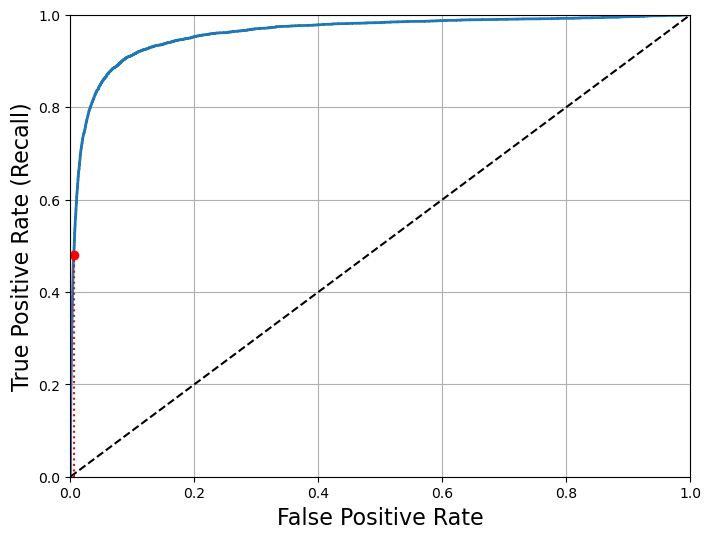

In [ ]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate (Recall)", fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)

# we select the fpr with 90% Precision
plt.figure(figsize=(8,6))
fpr_90_precision = fpr[np.argmax(tpr >= recall_90_precision)]
plot_roc_curve(fpr, tpr)
plt.plot([fpr_90_precision,fpr_90_precision],[0, recall_90_precision],'r:')
plt.plot([fpr_90_precision],[recall_90_precision],'ro')
plt.show()

Both the ROC and the Precision-Recall curve give multiple values of fpr, tpr, precision, recall values at different threshold levels. So that we can plot them

The tradeoff in ROC is that the higher the recall (TPR), the higher the FPR.

A purely random classifier is represented by that dotted line

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

> How to decide between ROC and PR?
>
> If positive class is rare or when we care more about false positives than false negatives (e.g. Is a claim fradulent? Positive = fraudulant. In this case we will choose PR because both FP and FN are costly, but the primary concern is the class imbalance. Positive class is rare and *thus* we choose PR curves.)


Receiver Operating Characteristic - Area under the Curve (ROC AUC) is a metric used to compare different classifiers.

Purely random: AUC = 0.5

Perfect Classifier: AUC = 1.0

> `sklearn` classifiers generally have one or the other
> - `decision_function()`
> - `predict_proba()`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [ ]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

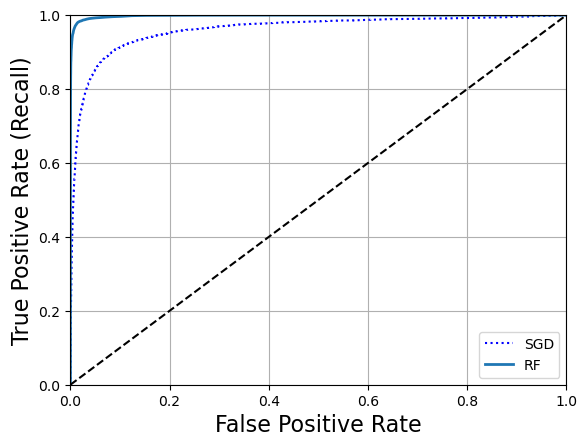

In [ ]:
recall_90_precision_forest =
plt.plot(fpr, tpr, 'b:', label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(precision_score(y_train_5,y_pred_forest))
print(recall_score(y_train_5, y_pred_forest))

0.9905083315756169
0.8662608374838591


Just lost 4 hours of work because I refreshed the Colab notebook. Multivariate classification done